In [1]:
 #numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

import time


#estimators\n",
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

# Performance metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, confusion_matrix

#model metrics\n",
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#cross validation\n",
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [2]:
#data
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [4]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [5]:
#dependent variable
depVar = rawData['PAY_AMT6']

In [6]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [7]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0       0
1    2000
2    5000
3    1000
4     679
Name: PAY_AMT6, dtype: int64

In [8]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [9]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900        0
29901      781
29902     5003
29903    30013
29904     1462
Name: PAY_AMT6, dtype: int64

In [10]:
X = rawData.iloc[:,1:-1]
y = rawData.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=12345)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((30000, 23), (30000,), (21000, 23), (9000, 23), (21000,), (9000,))

In [14]:
start_time = time.time()
rf = RandomForestClassifier(n_estimators = 400, max_depth = 50)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("--- %s seconds ---" % (time.time() - start_time))

[[6602  435]
 [1223  740]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7037
           1       0.63      0.38      0.47      1963

    accuracy                           0.82      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000

--- 40.78128910064697 seconds ---


In [15]:
print(rf.get_params())

accuracy = rf.score(X_test, y_test) 
accuracy

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': 50, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 400, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


0.8157777777777778

In [16]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }
print(random_grid)

{'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_depth': [10, 23, 36, 50, None]}


In [18]:
start_time = time.time()
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(train_features, train_labels)
rf_random.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 10.3min finished


--- 682.3652956485748 seconds ---


In [19]:
rf_random.best_params_

{'n_estimators': 273, 'max_depth': 10}

In [25]:
rf = RandomForestClassifier(n_estimators = 273, max_depth = 10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6675  362]
 [1259  704]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7037
           1       0.66      0.36      0.46      1963

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [27]:
accuracy = rf.score(X_test, y_test) 
accuracy

#print(rf.get_params())

0.8198888888888889

In [50]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [66]:
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               #'bootstrap': bootstrap
              }
print(param_grid)

{'n_estimators': [20, 62, 104, 146, 188, 231, 273, 315, 357, 400], 'max_depth': [10, 23, 36, 50, None]}


In [67]:
classifierRF = RandomForestRegressor()
# run grid search
grid_search = GridSearchCV(estimator = classifierRF, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 22.9min finished


GridSearchCV took 1470.98 seconds for 12 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.216 (std: 0.007)
Parameters: {'max_depth': 10, 'n_estimators': 400}

Model with rank: 2
Mean validation score: 0.216 (std: 0.008)
Parameters: {'max_depth': 10, 'n_estimators': 273}

Model with rank: 3
Mean validation score: 0.216 (std: 0.008)
Parameters: {'max_depth': 10, 'n_estimators': 315}



In [72]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [69]:
classifierRF = RandomForestClassifier(n_estimators = 400, max_depth = 10)
classifierRF.fit(X_train, y_train)
y_pred = classifierRF.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6674  363]
 [1251  712]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7037
           1       0.66      0.36      0.47      1963

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [29]:
# build a classifier
classifierSGD = SGDClassifier()
classifierSGD.fit(X_train, y_train)
y_pred = classifierSGD.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7017   20]
 [1956    7]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7037
           1       0.26      0.00      0.01      1963

    accuracy                           0.78      9000
   macro avg       0.52      0.50      0.44      9000
weighted avg       0.67      0.78      0.69      9000



In [39]:
print(classifierSGD.get_params())

#accuracy = classifierSGD.score(X_test, y_test) 
#accuracy

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [40]:
# use a full grid over all parameters
param_grid = {"n_iter_no_change": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              "penalty": ["none", "l1", "l2"]}

In [52]:
classifierSGD = SGDClassifier()
# run grid search
#grid_search = GridSearchCV(classifierSGD, param_grid=param_grid)
grid_search = GridSearchCV(estimator = classifierSGD, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 189 out of 189 | elapsed:  1.8min finished


GridSearchCV took 115.56 seconds for 14 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.778 (std: 0.000)
Parameters: {'alpha': 100, 'n_iter_no_change': 5, 'penalty': 'none'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 0.0001, 'n_iter_no_change': 10, 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 0.001, 'n_iter_no_change': 1, 'penalty': 'none'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 0.01, 'n_iter_no_change': 10, 'penalty': 'l2'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 10, 'n_iter_no_change': 10, 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.777 (std: 0.000)
Parameters: {'alpha': 100, 'n_iter_no_change': 10, 'penalty': 'l1'}



C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [53]:
grid_search.best_params_

{'alpha': 100, 'n_iter_no_change': 5, 'penalty': 'none'}

In [70]:
# build a classifier
classifierSGD = SGDClassifier(alpha = 100, n_iter_no_change = 5, penalty = 'none' )
classifierSGD.fit(X_train, y_train)
y_pred = classifierSGD.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2428 4609]
 [ 951 1012]]
              precision    recall  f1-score   support

           0       0.72      0.35      0.47      7037
           1       0.18      0.52      0.27      1963

    accuracy                           0.38      9000
   macro avg       0.45      0.43      0.37      9000
weighted avg       0.60      0.38      0.42      9000



C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [14]:
classifierTree = DecisionTreeClassifier()
#dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
classifierTree.fit(X_train, y_train)
y_pred = classifierTree.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5737 1300]
 [1110  853]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      7037
           1       0.40      0.43      0.41      1963

    accuracy                           0.73      9000
   macro avg       0.62      0.62      0.62      9000
weighted avg       0.74      0.73      0.74      9000



In [55]:
# Number of trees in KNeighborsClassifier
n_neighbors = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]

# Create the param grid
param_grid = {'n_neighbors': n_neighbors}
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}


In [56]:
classifierKnn = KNeighborsClassifier()
# run grid search
grid_search = GridSearchCV(estimator = classifierKnn, param_grid = param_grid, scoring='accuracy',
                          cv = 3, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   18.6s


GridSearchCV took 32.13 seconds for 12 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.778 (std: 0.001)
Parameters: {'n_neighbors': 18}

Model with rank: 2
Mean validation score: 0.778 (std: 0.001)
Parameters: {'n_neighbors': 20}

Model with rank: 3
Mean validation score: 0.776 (std: 0.001)
Parameters: {'n_neighbors': 19}



[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   31.9s finished


In [57]:
grid_search.best_params_

{'n_neighbors': 18}

In [58]:
classifierKnn = KNeighborsClassifier(n_neighbors = 18)
classifierKnn.fit(X_train, y_train)
y_pred = classifierKnn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6856  181]
 [1806  157]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      7037
           1       0.46      0.08      0.14      1963

    accuracy                           0.78      9000
   macro avg       0.63      0.53      0.50      9000
weighted avg       0.72      0.78      0.71      9000



In [16]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

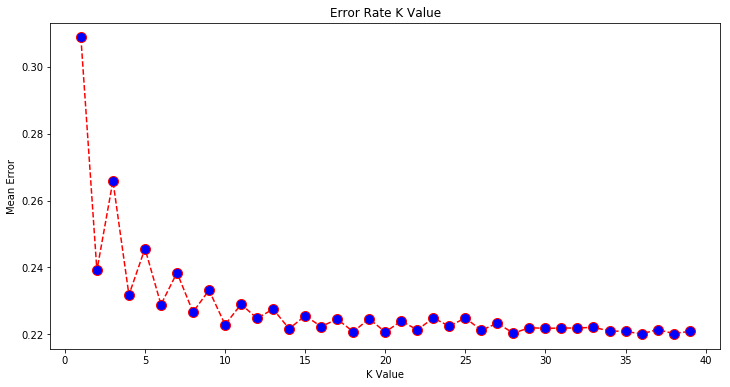

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [59]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}
                   ]


In [60]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [61]:
classifierSVC = SVC()
# run grid search
grid_search = GridSearchCV(estimator = classifierSVC, param_grid = param_grid, scoring='accuracy',
                          cv = 2, n_jobs = -1, verbose = 2)
start = time.time()
grid_search.fit(X_train, y_train)
 
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time.time() - start, len(grid_search.cv_results_)))
report(grid_search.cv_results_)

Fitting 2 folds for each of 25 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 30.4min finished


GridSearchCV took 2120.03 seconds for 13 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.779 (std: 0.001)
Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 2
Mean validation score: 0.779 (std: 0.000)
Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Model with rank: 3
Mean validation score: 0.778 (std: 0.001)
Parameters: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}



In [63]:
grid_search.best_params_
classifierSVC = SVC(C = 1, gamma = 0.001, kernel = 'rbf')
classifierSVC.fit(X_train, y_train)
y_pred = classifierSVC.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7001   36]
 [1920   43]]
              precision    recall  f1-score   support

           0       0.78      0.99      0.88      7037
           1       0.54      0.02      0.04      1963

    accuracy                           0.78      9000
   macro avg       0.66      0.51      0.46      9000
weighted avg       0.73      0.78      0.70      9000



In [23]:
# training a linear SVM classifier 
svm_model_linear = SVC(max_iter=10000) #SVC(kernel = 'linear', C = 1)
#svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
#accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
#cm = confusion_matrix(y_test, svm_predictions) 


In [24]:
svm_model_linear.fit(X_train, y_train)

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [25]:
svm_predictions = svm_model_linear.predict(X_test) 

In [29]:
y_pred = svm_model_linear.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[6935  102]
 [1887   76]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.87      7037
           1       0.43      0.04      0.07      1963

    accuracy                           0.78      9000
   macro avg       0.61      0.51      0.47      9000
weighted avg       0.71      0.78      0.70      9000



In [30]:
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 


In [31]:
# model accuracy for X_test   
accuracy 
  
# creating a confusion matrix 
cm


array([[6935,  102],
       [1887,   76]], dtype=int64)

In [13]:
model = LinearRegression(n_jobs=10)

In [14]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [15]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [16]:
#dependent variable
print(depVar)

0            0
1         2000
2         5000
3         1000
4          679
5          800
6        13770
7         1542
8         1000
9            0
10          66
11        3640
12           0
13           0
14        3000
15        1100
16           0
17       50000
18           0
19           0
20       33764
21           0
22        1820
23        1128
24        2000
25         997
26        1000
27        1012
28           0
29           0
         ...  
29970    16080
29971     3000
29972     4800
29973        0
29974     1000
29975     7022
29976        0
29977     5000
29978    10059
29979        0
29980     2000
29981      585
29982        0
29983     1701
29984     1000
29985        0
29986        0
29987     4005
29988     6009
29989        0
29990     2000
29991        0
29992        0
29993     2000
29994     4000
29995     1000
29996        0
29997     3100
29998     1804
29999     1000
Name: PAY_AMT6, Length: 30000, dtype: int64


In [17]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [18]:
#Random Forest

modelRF.fit(X_train,y_train)

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [19]:
#Support Vector Regression

modelSVR.fit(X_train,y_train)

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
#Linear Regression

modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(cross_val_score(modelRF, X_train, y_train)) 

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[  0.07472474 -22.05283227   0.10298602]


In [22]:
model.score(X_train,y_train)

0.6417018169802264

In [23]:
#Random Forest Regression Model Fitting and Scoring

#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.11176637 -7.28570379  0.03736343]


C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8278631362748252

In [24]:
#Support Vector Regression Model Fitting and Scoring

modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto'

[-0.03372017 -0.05080394 -0.0224901 ]


-0.02173006014362433

In [25]:
#Linear Regression Model Fitting and Scoring

modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[  0.6521652  -19.64336805   0.42790351]


C:\Users\Cindy\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.6417018169802264

In [26]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.032
RMSE: 10937.654


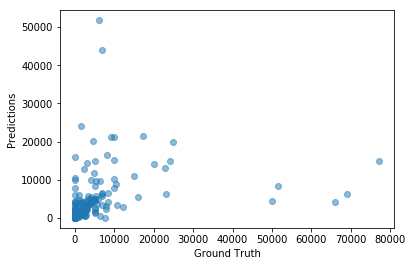

In [27]:
#Plotting the Results
#plt.scatter(y_test, predictions, color=['blue','green'], alpha = 0.5)
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();